### PyTorch Intro I: The Basics

This notebook supports the Slides "A Practical Intro to PyTorch I - Basics".  It is structured as follows:

1. Building a Neural Net with PyTorch    
  a. Defining and working Tensors     
  b. Basic Layer Construction  
  c. Basic Network Construction: Sub-classing of nn.Module  

2. Dealing with data  
  a. Data sets  
  b. Data loader

3. Neural Net Training    
  a. Loss/Cost Functions    
  b. Gradients     
  c. Optimizers    
  d. Training & Eval loops  

4. Practical Considerations    
  a. Saving a model  
  b. Loading a model  
  c. CPU and GPU usage   


A lot of the content originates in the [PyTorch Tutorial](https:/https://pytorch.org/tutorials/beginner/basics/intro.html/)

Let's start with a few installs and imports:


In [ ]:
%%capture

#!pip install torch
#!pip install transformers   # for our application example in the end
#!pip install numpy

In [1]:
import torch
import numpy as np

### 1. Building a Neural Network with PyTorch

#### a. Defining and working Tensors

A tensor is simply a multi-dimensional generalization of a matrix and it is a central element of neural nets. Let's define a tensor in PyTorch and familiarize ourselves with these objects.

You can create a tensor from a list (of lists), from a numpy array, or define it directly through PyTorch:

In [2]:
data = [[1, 2, 3],[4, 5, 6]]
x_data = torch.tensor(data)

x_data

tensor([[1, 2, 3],
        [4, 5, 6]])

In [3]:
np_array = np.array(data)
x_np = torch.tensor(np_array)
x_np

tensor([[1, 2, 3],
        [4, 5, 6]])

In [4]:
x_rand = torch.rand_like(x_data, dtype=torch.float)
x_rand

tensor([[0.4436, 0.6623, 0.6207],
        [0.8975, 0.8524, 0.0107]])

How do we get the shape? 'Think numpy':  

In [5]:
x_rand.shape

torch.Size([2, 3])

Let's slice and dice tensors to get other tensors. Very straightforward:

In [6]:
x_rand[:, -1]

tensor([0.6207, 0.0107])

In [7]:
x_rand[1:]

tensor([[0.8975, 0.8524, 0.0107]])

In [8]:
x_rand[:, 1:]

tensor([[0.6623, 0.6207],
        [0.8524, 0.0107]])

All as expected...

How do we transpose and then multiply tensors?

In [9]:
x_rand

tensor([[0.4436, 0.6623, 0.6207],
        [0.8975, 0.8524, 0.0107]])

In [10]:
x_rand.T

tensor([[0.4436, 0.8975],
        [0.6623, 0.8524],
        [0.6207, 0.0107]])

In [11]:
prod = x_rand.matmul(x_rand.T)
prod

tensor([[1.0207, 0.9694],
        [0.9694, 1.5322]])

In [12]:
prod.numpy()

array([[1.0206786 , 0.96938396],
       [0.96938396, 1.5322416 ]], dtype=float32)

'.T' does the transposition. I get a 2 x 2 result from multiplying a 2 x 3 matrix with its transpose (from the left).

All good. How do we move the other way around, from torch to numpy values?

In [13]:
type(prod.numpy())

numpy.ndarray

#### b. Working with Layers

In [14]:
from torch import nn

Let's start by defining a simple linear layer, corresponding to a 100 x 200 matrix and corresponding weights:

In [15]:
linear_layer = nn.Linear(100, 200)
linear_layer

Linear(in_features=100, out_features=200, bias=True)

In [16]:
linear_layer.weight

Parameter containing:
tensor([[ 0.0696,  0.0107,  0.0198,  ..., -0.0204,  0.0280,  0.0452],
        [-0.0782, -0.0481,  0.0937,  ...,  0.0618,  0.0122, -0.0270],
        [ 0.0050, -0.0202, -0.0063,  ...,  0.0529,  0.0065,  0.0514],
        ...,
        [-0.0637, -0.0537,  0.0565,  ...,  0.0667,  0.0159, -0.0655],
        [-0.0532,  0.0481, -0.0932,  ...,  0.0819,  0.0780, -0.0659],
        [-0.0963, -0.0398,  0.0096,  ...,  0.0613, -0.0471,  0.0310]],
       requires_grad=True)

In [17]:
linear_layer.weight.shape

torch.Size([200, 100])

In [18]:
linear_layer.weight

Parameter containing:
tensor([[ 0.0696,  0.0107,  0.0198,  ..., -0.0204,  0.0280,  0.0452],
        [-0.0782, -0.0481,  0.0937,  ...,  0.0618,  0.0122, -0.0270],
        [ 0.0050, -0.0202, -0.0063,  ...,  0.0529,  0.0065,  0.0514],
        ...,
        [-0.0637, -0.0537,  0.0565,  ...,  0.0667,  0.0159, -0.0655],
        [-0.0532,  0.0481, -0.0932,  ...,  0.0819,  0.0780, -0.0659],
        [-0.0963, -0.0398,  0.0096,  ...,  0.0613, -0.0471,  0.0310]],
       requires_grad=True)

Great... let's try to convert these into a numpy array:

In [19]:
linear_layer.weight.numpy()

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

Ouch, why the error? You need to 'detach' the object first. A layer is more than just the action of weights and biases.

In [20]:
linear_layer.weight.detach().numpy()

array([[ 0.06957863,  0.01073621,  0.01979731, ..., -0.02038162,
         0.02800957,  0.04524515],
       [-0.0782189 , -0.0481025 ,  0.0937292 , ...,  0.06180744,
         0.01222303, -0.02695934],
       [ 0.00502089, -0.02019792, -0.00626776, ...,  0.0529028 ,
         0.00648832,  0.05139188],
       ...,
       [-0.06374276, -0.05367049,  0.05653309, ...,  0.06667212,
         0.01586897, -0.06550749],
       [-0.05324009,  0.04813758, -0.09315715, ...,  0.0819044 ,
         0.07799258, -0.06592729],
       [-0.09626263, -0.03983566,  0.00958504, ...,  0.06132403,
        -0.04707544,  0.03098365]], dtype=float32)

What about activation functions? Simple! They are also in torch.nn:

In [21]:
nn.ReLU()

ReLU()

Great. So the nn package has a lot of what we need. Now we are ready to build our first simple neural net using nn.module!

#### c. Building a neural net

We need to subclass nn.Module, the base class for all neural network modules in PyTorch.

We need to first implement the \_\_init\_\_ and forward methods:



*   \_\_init\_\_:  ~ define the layers in the network
*   forward: ~ define how the layers act on the input to generate the output(s)

Here is the first simple example:



In [22]:
class MyBasicNetworkClass(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        self.relu = nn.ReLU()

    def forward(self, x):                             # x represents the input that the network will use/act on later
        out_linear = self.linear(x)
        output = self.relu(out_linear)
        return output

Let's test it.

We first define a test input (What shape does it need to have?), and then act with the network on it.

Here is the test input:

In [23]:
input_dim = 3
output_dim = 5

test_input = torch.tensor(np.random.random(input_dim), dtype=torch.float) # the types will need to match with the types in the network
test_input

tensor([0.8602, 0.9328, 0.9199])

And now let's try to act with the network 'on it', i.e., use this test _inout as the input to our network. For this, we first need to create an instance of the network and then apply it to the input:

In [24]:
my_basic_network = MyBasicNetworkClass(input_dim=input_dim, output_dim=output_dim)
my_basic_network

MyBasicNetworkClass(
  (linear): Linear(in_features=3, out_features=5, bias=True)
  (relu): ReLU()
)

Ok, that makes sense.

Let's look at the action of the network on this test input:

In [25]:
test_output = my_basic_network(test_input)
test_output

tensor([0.3740, 0.0000, 0.0000, 0.0000, 0.6927], grad_fn=<ReluBackward0>)

Perfect! That looks right. (Why all the zeros?)

Our first basic neural net using sub-classing! This is the base to work off from!

What happens if we have 10 examples in a batch?

In [26]:
batched_test_input = torch.tensor(np.random.random(30).reshape(10, 3), dtype=torch.float)
batched_test_input.shape

torch.Size([10, 3])

In [27]:
batched_test_output = my_basic_network(batched_test_input)
batched_test_output.shape

torch.Size([10, 5])

In [28]:
batched_test_output.shape

torch.Size([10, 5])

That looks right again! Implicitly __broadcasting__ was used, where the network, which technically expected a dim=3 input, received a dim=10x3, and it applied the network actions independently to each of the 10 examples in the batch.

What if we do not want to hard-code the dimensions into the network class? Again, the approach is very pythonic: we define the parameters in the init step.

Let's try that and also extend the network a bit to act as a simple classification network. We could do that be adding another layer with __one__ output neuron and use a sigmoid activation function:   


In [29]:
class MySimpleClassificationNetworkClass(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super().__init__()
        self.linear_1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.linear_2 = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()


    def forward(self, x):                             # x stands for the input that the network will use/act on later
        hidden = self.relu(self.linear_1(x))
        output = self.sigmoid(self.linear_2(hidden))
        return output

Let's test this out:

In [30]:
my_simple_classification_network = MySimpleClassificationNetworkClass(input_dim=2, hidden_dim=4)
my_simple_classification_network

MySimpleClassificationNetworkClass(
  (linear_1): Linear(in_features=2, out_features=4, bias=True)
  (relu): ReLU()
  (linear_2): Linear(in_features=4, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [31]:
my_simple_classification_network.linear_1

Linear(in_features=2, out_features=4, bias=True)

In [32]:
my_simple_classification_network.linear_1.bias

Parameter containing:
tensor([-0.1663,  0.3813, -0.4476,  0.1922], requires_grad=True)

Let's look at the model in more comprehensively:

In [33]:
print(f"Model structure: {my_simple_classification_network}\n\n")

for name, param in my_simple_classification_network.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: MySimpleClassificationNetworkClass(
  (linear_1): Linear(in_features=2, out_features=4, bias=True)
  (relu): ReLU()
  (linear_2): Linear(in_features=4, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


Layer: linear_1.weight | Size: torch.Size([4, 2]) | Values : tensor([[-0.6177, -0.5957],
        [ 0.2173,  0.2986]], grad_fn=<SliceBackward0>) 

Layer: linear_1.bias | Size: torch.Size([4]) | Values : tensor([-0.1663,  0.3813], grad_fn=<SliceBackward0>) 

Layer: linear_2.weight | Size: torch.Size([1, 4]) | Values : tensor([[-0.3204, -0.2926, -0.4486,  0.0074]], grad_fn=<SliceBackward0>) 

Layer: linear_2.bias | Size: torch.Size([1]) | Values : tensor([-0.2615], grad_fn=<SliceBackward0>) 




Looks right!

Now what about the actions on a fake batch of dim=2 inputs?


In [34]:
batched_test_classification_input = torch.tensor(np.random.random(20).reshape(10, 2), dtype=torch.float)
batched_test_classification_input

tensor([[0.3427, 0.1684],
        [0.4139, 0.6248],
        [0.7938, 0.1998],
        [0.8596, 0.7983],
        [0.0128, 0.0577],
        [0.0165, 0.6082],
        [0.8933, 0.5487],
        [0.3353, 0.3896],
        [0.7779, 0.7650],
        [0.6982, 0.8574]])

In [35]:
batched_test_classification_output = my_simple_classification_network(batched_test_classification_input)
batched_test_classification_output

tensor([[0.3990],
        [0.3885],
        [0.3915],
        [0.3781],
        [0.4067],
        [0.3953],
        [0.3828],
        [0.3946],
        [0.3800],
        [0.3793]], grad_fn=<SigmoidBackward0>)

Looks correct again! Since the input was random and the initialization of the network layers was random we expect essentially a set of 50/50s.

Before we continue with training of the network, let's talk about datasets and data loaders

### 2. Dealing with data

#### a. Datasets

First off, PyTorch comes with a lot of datasets across many domains (text, vision, etc.). Here is a vision example (see: https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#):




In [36]:
%%capture
#import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


In [37]:
%%capture

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [38]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

How does the data 'look' like?

In [39]:
training_data[1]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
           0.0000, 0.0000, 0.1608, 0.7373, 0.4039, 0.2118, 0.1882, 0.1686,
           0.3412, 0.6588, 0.5216, 0.0627, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.1922,
           0.5333, 0.8588, 0.8471, 0.8941, 0.9255, 1.0000, 1.0000, 1.0000,
           1.0000, 0.8510, 0.8431, 0.9961, 0.9059, 0.6275, 0.1765, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0549, 0.6902, 0.8706,
           0.8784, 0.8314, 0.7961, 0.7765, 0.7686, 0.7843, 0.8431, 0.8000,
           0.7922, 0.7882, 0.7882, 0.7882, 0.8196, 0.8549, 0.8784, 0.6431,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7373, 0.8588, 0.7843,
           0.7765, 0.7922, 0.7765, 0.7804, 0.7804, 0.7882, 0.7686, 0.7765,
           0.7765, 0.7843, 0.7843, 0.7843, 

Ok. Looks like the digitized image and a label. Here is a better way to look at the data in this case:

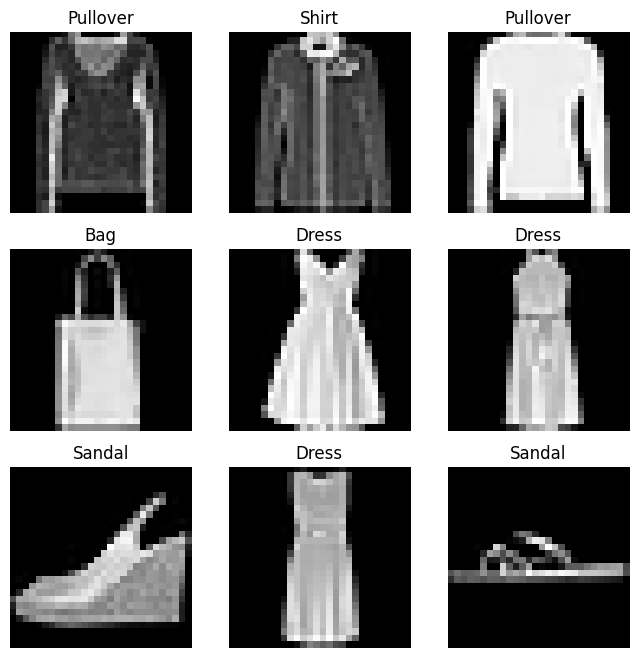

In [40]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()


More importantly though Dataset and Dataloader should be used to manage your training/validation/test data. It abstracts the data management and ensures that the data works well with your PyTorch networks.

_Dataset_: stores the data and labels (as you saw above)
_Dataoader_: creates an iterable of the data for easy and consistent access to the data samples.

#### a) Dataset

You should create a Dataset from your data for much easier use later on. To do that, you need to subclass _Dataset_ (https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#creating-a-custom-dataset-for-your-files).

For concreteness, let's generate a fake dataset with 1000 random 5-d vectors and a random label which can be zero or 1:    

In [41]:
X_fake = np.random.random(500).reshape(100, 5)
y_fake = [np.random.randint(2) for _ in range(100)]

In [42]:
data_fake = [(x, y) for x, y in zip(list(X_fake), list(y_fake))]
data_fake[:5]



[(array([0.52488372, 0.84951109, 0.63859506, 0.88679697, 0.07023013]), 0),
 (array([0.62124263, 0.87820287, 0.94875157, 0.16829122, 0.88998649]), 1),
 (array([0.59754729, 0.50293544, 0.58112469, 0.59558779, 0.82218274]), 0),
 (array([0.5793454 , 0.71574223, 0.79182865, 0.79401015, 0.77257269]), 0),
 (array([0.29291162, 0.37138515, 0.53685856, 0.36600734, 0.70865917]), 1)]

Now let's set up the dataset. We need to implement  \_\_init\_\_, \_\_len\_\_, and \_\_getitem\_\_:

In [43]:
class MyDataset(Dataset):
    def __init__(self, data):
        self.data = data


    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x = torch.tensor(self.data[idx][0])    #not a bad idea to create torch tensors from the data
        y = self.data[idx][1]
        return x, y

Really simple. Let's look at this for our fake data:

In [44]:
myFakeData = MyDataset(data_fake)

In [45]:
myFakeData

In [46]:
len(myFakeData)

100

In [47]:
myFakeData[16]

(tensor([0.9618, 0.1832, 0.6593, 0.4437, 0.2307], dtype=torch.float64), 1)

Looks good. Now we use the Dataloader to manage the samples.

#### b) Dataloader

In [48]:
data_fake_dataloader = DataLoader(myFakeData, batch_size=16, shuffle=True)


So what can we do with this? For example, iterate through batches:

In [49]:
iter_fake_data_loader = iter(data_fake_dataloader)
iter_fake_data_loader

In [50]:
fake_features, fake_labels = next(iter_fake_data_loader)
fake_features

tensor([[0.4961, 0.4312, 0.1472, 0.8265, 0.8526],
        [0.8471, 0.1239, 0.7129, 0.4285, 0.0925],
        [0.6886, 0.2092, 0.4898, 0.0864, 0.3000],
        [0.5687, 0.3181, 0.8602, 0.6857, 0.8826],
        [0.7198, 0.3124, 0.0323, 0.6118, 0.7719],
        [0.1790, 0.0632, 0.9235, 0.4248, 0.9285],
        [0.9598, 0.0321, 0.2272, 0.4758, 0.3392],
        [0.7226, 0.5040, 0.7619, 0.6818, 0.8677],
        [0.9939, 0.5409, 0.2406, 0.4121, 0.3956],
        [0.0234, 0.2374, 0.5223, 0.2856, 0.8053],
        [0.4912, 0.1136, 0.3533, 0.8890, 0.1934],
        [0.3961, 0.0329, 0.9735, 0.9893, 0.4447],
        [0.1506, 0.6210, 0.7532, 0.4933, 0.2410],
        [0.5118, 0.2463, 0.3557, 0.2457, 0.5762],
        [0.2571, 0.6212, 0.1585, 0.2748, 0.9878],
        [0.5868, 0.4909, 0.9655, 0.6435, 0.8030]], dtype=torch.float64)

In [51]:
next(iter_fake_data_loader)

[tensor([[0.2915, 0.7283, 0.6577, 0.7370, 0.9224],
         [0.8383, 0.1330, 0.1960, 0.5447, 0.8223],
         [0.3037, 0.2248, 0.1180, 0.6367, 0.7678],
         [0.7290, 0.3545, 0.6402, 0.4510, 0.0444],
         [0.3525, 0.4142, 0.9150, 0.0407, 0.7123],
         [0.8192, 0.0849, 0.4965, 0.4276, 0.4939],
         [0.7297, 0.3748, 0.8288, 0.5806, 0.9542],
         [0.1712, 0.2535, 0.5353, 0.0729, 0.7122],
         [0.0253, 0.1101, 0.7461, 0.9029, 0.4163],
         [0.7313, 0.3338, 0.4670, 0.0328, 0.2064],
         [0.4990, 0.5612, 0.9129, 0.2663, 0.6398],
         [0.5793, 0.7157, 0.7918, 0.7940, 0.7726],
         [0.6212, 0.8782, 0.9488, 0.1683, 0.8900],
         [0.8457, 0.6535, 0.8854, 0.5889, 0.1183],
         [0.6100, 0.1721, 0.0487, 0.1639, 0.2830],
         [0.2444, 0.4944, 0.6813, 0.2242, 0.9558]], dtype=torch.float64),
 tensor([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1])]

Great. Now we can 'train' a model for our fake data!

### 3) Train the Network

But before we are ready to write a training loop we need to start with the loss and then look at the gradients needed for backprop.

#### a) Loss Function

These are also in the nn module (https://pytorch.org/docs/stable/nn.html#loss-functions). For example, here is the binary cross entropy loss:

In [52]:
loss_fn = nn.BCELoss()
loss_fn

BCELoss()

In [53]:
loss_fn(torch.tensor([0.8, 0.4], dtype=torch.float64), torch.tensor([1, 0], dtype=torch.float64))

tensor(0.3670, dtype=torch.float64)

Is this correct?

In [54]:
1/2 * (-np.log(0.8) -np.log(0.6) )

np.float64(0.3669845875401002)

Cool! Correct!

Now on to the gradients.

#### b) Gradients

Gradients are computed through torch.autograd (see: https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html#automatic-differentiation-with-torch-autograd)

In [55]:

x = torch.tensor(np.array([[2.,]]), requires_grad=False, dtype=torch.float) # one sample, one feature with value 1
y = torch.tensor(np.array([4.,]), requires_grad=False, dtype=torch.float)  # expected output, one sample with one output neuron with value 2

w = torch.tensor(np.array([2.,]), requires_grad=True, dtype=torch.float)
b = torch.tensor(np.array([1,]), requires_grad=True, dtype=torch.float)

z = torch.matmul(x, w) + b

loss = nn.MSELoss()(z,y)


# y_calc = x * w + b

In [56]:
print('Output: ', z)

Output:  tensor([5.], grad_fn=<AddBackward0>)


So this is the PyTorch way of calculating $2x + 1$ with $x=2$, and calculating the error for target value $y=4$.

What should the loss be? $(2*2 + 1 - 4)^2 = 1$

In [57]:
loss

tensor(1., grad_fn=<MseLossBackward0>)

Correct. So what about the gradients?

In [58]:
loss.backward()   # compute derivatives
print(w.grad)    # dloss/dw
print(b.grad)   # dloss/db

tensor([4.])
tensor([2.])


Correct?

Loss:

$\rm{loss} = (wx + b - y)^2 = (2 * w + b - 4)^2$

Derivatives with respect to __model parameters__ at __$x = 1$__:

$\frac{d\rm{loss}}{dw} = 2 (2 * w + b - 4) * 2 = 4$

$\frac{d\rm{loss}}{db} = 2 (2 * w + b - 4) = 2$



So w.grad/b.grad are the indeed the gradients.

We are now ready to move on to the optimizers.

#### c) Optimizers

The optimizers can be found in torch.optim. For example, here is the Adam optimizer, that will be in charge of optimizing the parameters of our earlier model. (Adam and AdamW are usually effective optimizers, generally outperforming SGD significantly.)


In [59]:
adam_opt = torch.optim.Adam(params=my_simple_classification_network.parameters(), lr=0.001)
adam_opt

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

Now we are ready to put it all together.

#### d) Training the Network

In addition to what we did above, we need to define a training loop (and optionally also an eval loop.). But let's put it all back together, now also adding a bit of a signal to our training/test data.

Data:

In [60]:
n_train = 600
n_test = 100
n_features = 5
eps = 0.3

y_train = torch.tensor([1.0] * int(n_train/2) + [0.] * int(n_train/2), dtype=torch.float32).unsqueeze(1)
X_train = (torch.tensor(np.random.random(n_train * n_features).reshape([n_train, n_features]), dtype=torch.float32) +
           eps * y_train.matmul(torch.tensor([[1.] * n_features], dtype=torch.float32)) )                    # add a bit of a signal so that we can train a bit

y_test = torch.tensor([1.0] * int(n_test/2) + [0.] * int(n_test/2), dtype=torch.float32).unsqueeze(1)
X_test = (torch.tensor(np.random.random(n_test * n_features).reshape([n_test, n_features]), dtype=torch.float32) +
           eps * y_test.matmul(torch.tensor([[1.] * n_features], dtype=torch.float32)) )                    # ditto for test


In [61]:
y_test[:3]

tensor([[1.],
        [1.],
        [1.]])

Datasets:

In [62]:
class MyDataset(Dataset):
    def __init__(self, X, y):
        self.data = [(a, b) for a,b in zip(list(X), list(y))]    # first dimension in X and y is the barch dimension


    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x = self.data[idx][0]
        y = self.data[idx][1]
        return x, y

training_data = MyDataset(X_train, y_train)
test_data = MyDataset(X_test, y_test)

In [63]:
test_data[2]

(tensor([0.6445, 1.0221, 0.6138, 0.8083, 0.7090]), tensor([1.]))

Dataloaders:

In [64]:
batch_size = 16

training_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

Network:

In [65]:
class MySimpleClassificationNetworkClass(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super().__init__()
        self.linear_1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.linear_2 = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()


    def forward(self, x):                             # x stands for the input that the network will use/act on later
        hidden = self.relu(self.linear_1(x))
        output = self.sigmoid(self.linear_2(hidden))
        return output

my_classification_network = MySimpleClassificationNetworkClass(n_features, hidden_dim=8)

Let's do a quick test:

In [66]:
my_classification_network(X_train)[:5]

tensor([[0.5463],
        [0.5662],
        [0.5569],
        [0.5710],
        [0.5695]], grad_fn=<SliceBackward0>)

Looks right, one output neuron per example. Classification changes somewhere in 50/50 area, as expected.

Loss Function & Optimizer:

In [67]:
loss_fn = nn.BCELoss()
adam_optimizer = torch.optim.Adam(my_classification_network.parameters(), lr=0.001)

Now we are ready for the training and eval loops, following and modifying https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html#full-implementation.

Training & Eval loops:

In [68]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    epoch_loss = 0
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss

        pred = model(X)

        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()                      # the gradients need to be zeroed out after the gradients are applied by the optimizer

        epoch_loss += loss.item()

    print(f"Training Results: \n  Avg train loss: {epoch_loss/batch:>8f} \n")



def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for batch, (X, y) in enumerate(dataloader):
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            #print((pred.argmax(1) == y))
            predictions = [int(x[0] > 0.5) for x in pred]
            labels = [int(x[0] > 0.5) for x in y]
            correct += np.sum([x == y for (x, y) in zip(predictions, labels)])


    test_loss /= num_batches
    correct /= size
    print(f"Test Results: \n Test Accuracy: {(100*correct):>0.1f}%, Avg test loss: {test_loss:>8f} \n")

Now... let's go! Let's also allow to place the model and the data on cpu or gpu via setting the device.

In [69]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # try cuda if gpu is available

my_classification_network = my_classification_network.to('cuda')
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)
batch_size = 16

training_data = MyDataset(X_train, y_train)
test_data = MyDataset(X_test, y_test)

training_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)



In [70]:
device

device(type='cuda')

In [71]:
%%time
epochs = 20
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(training_dataloader, my_classification_network, loss_fn, adam_optimizer)
    test_loop(test_dataloader, my_classification_network, loss_fn) # no optimizer use here!
print("Done!")

Epoch 1
-------------------------------
Training Results: 
  Avg train loss: 0.699061 

Test Results: 
 Test Accuracy: 50.0%, Avg test loss: 0.677203 

Epoch 2
-------------------------------
Training Results: 
  Avg train loss: 0.693292 

Test Results: 
 Test Accuracy: 50.0%, Avg test loss: 0.664336 

Epoch 3
-------------------------------
Training Results: 
  Avg train loss: 0.686206 

Test Results: 
 Test Accuracy: 50.0%, Avg test loss: 0.668953 

Epoch 4
-------------------------------
Training Results: 
  Avg train loss: 0.681830 

Test Results: 
 Test Accuracy: 51.0%, Avg test loss: 0.670154 

Epoch 5
-------------------------------
Training Results: 
  Avg train loss: 0.677042 

Test Results: 
 Test Accuracy: 53.0%, Avg test loss: 0.661207 

Epoch 6
-------------------------------
Training Results: 
  Avg train loss: 0.669740 

Test Results: 
 Test Accuracy: 57.0%, Avg test loss: 0.658529 

Epoch 7
-------------------------------
Training Results: 
  Avg train loss: 0.665649 



In [72]:
np.exp(0.69)

np.float64(1.9937155332430823)

Looks like a decent enough model.



How could we save and later restore?

### 5. Saving and Restoring

Easy!

If you want to save the full model with structure and parameters, use:



In [ ]:
torch.save(my_classification_network, 'my_new_classification_network.pth')

You can then restore it into a new network as:

In [ ]:
my_restored_classification_network = torch.load('my_new_classification_network.pth')

In [ ]:
test_loop(test_dataloader, my_restored_classification_network, loss_fn)

In the next notebook, let's apply everything we have learned to a real problem: sentiment classification for texts!